In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [5]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [22]:
q1 = df.dur.quantile(0.25)
q3 = df.dur.quantile(0.75)
iqr = q3 - q1
upper = q3 + (iqr * 1.5)
lower = q1 - (iqr * 1.5)
print('Lower thersold : ', lower,'\n'
      'Upper thersold : ', upper)

Lower thersold :  -221.0 
Upper thersold :  643.0


In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [6]:
df=df.drop_duplicates()

In [7]:
df.shape

(45205, 11)

In [8]:
df['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [9]:
df['job']=df['job'].replace('unknown',np.nan)

C:\Users\NP Family\AppData\Local\Temp\ipykernel_15292\2567602984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job']=df['job'].replace('unknown',np.nan)


In [10]:
df['marital'].value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [11]:
df['education_qual'].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [12]:
df['education_qual']=df['education_qual'].replace('unknown',np.nan)

C:\Users\NP Family\AppData\Local\Temp\ipykernel_15292\4123544792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education_qual']=df['education_qual'].replace('unknown',np.nan)


In [13]:
df['call_type'].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [14]:
df['prev_outcome'].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [15]:
df.isnull().sum()

age                  0
job                288
marital              0
education_qual    1857
call_type            0
day                  0
mon                  0
dur                  0
num_calls            0
prev_outcome         0
y                    0
dtype: int64

In [16]:
df['education_qual']=df['education_qual'].fillna('secondary')

C:\Users\NP Family\AppData\Local\Temp\ipykernel_15292\3798906380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education_qual']=df['education_qual'].fillna('secondary')


In [17]:
df.isnull().sum()

age                 0
job               288
marital             0
education_qual      0
call_type           0
day                 0
mon                 0
dur                 0
num_calls           0
prev_outcome        0
y                   0
dtype: int64

In [18]:
df['job']=df['job'].fillna('student')

C:\Users\NP Family\AppData\Local\Temp\ipykernel_15292\2806473866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job']=df['job'].fillna('student')


In [20]:
df['target']=df['y'].map({'yes':1,'no':0})

C:\Users\NP Family\AppData\Local\Temp\ipykernel_15292\4142706545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target']=df['y'].map({'yes':1,'no':0})


In [21]:
df.groupby('prev_outcome')['target'].mean()

prev_outcome
failure    0.126097
other      0.166848
success    0.647253
unknown    0.091630
Name: target, dtype: float64

<AxesSubplot:ylabel='job'>

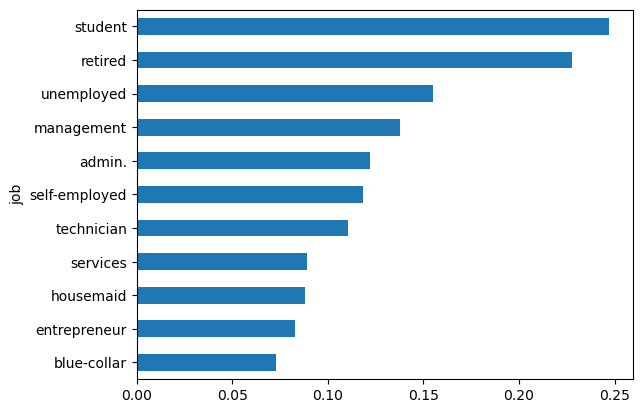

In [23]:
df.groupby('job')['target'].mean().sort_values().plot(kind='barh')

In [ ]:
#Students are the one who most subscribed customers in insurance

<AxesSubplot:ylabel='marital'>

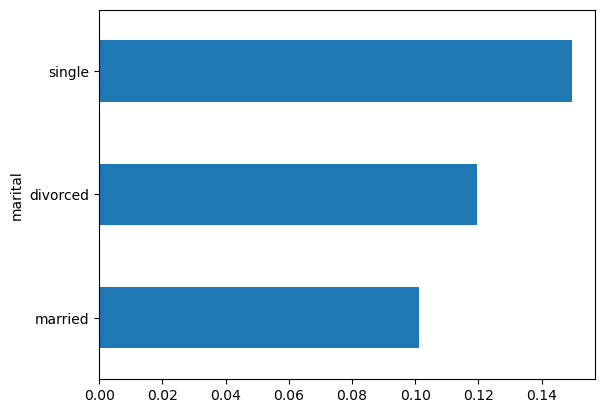

In [25]:
df.groupby('marital')['target'].mean().sort_values().plot(kind='barh')

In [ ]:
#single persons are most subscribed customers

<AxesSubplot:ylabel='education_qual'>

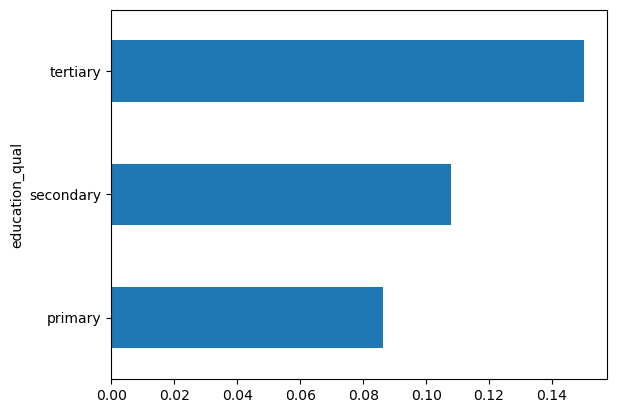

In [26]:
df.groupby('education_qual')['target'].mean().sort_values().plot(kind='barh')

<AxesSubplot:ylabel='call_type'>

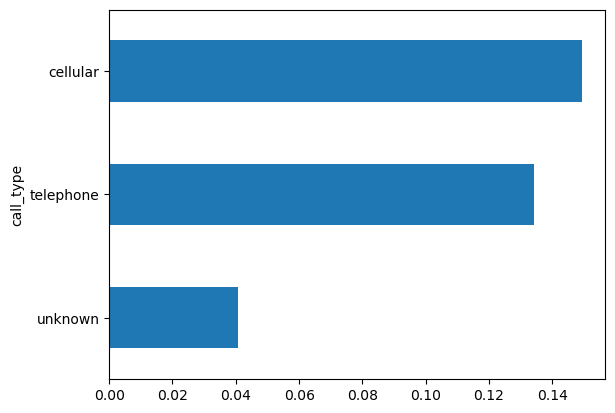

In [27]:
df.groupby('call_type')['target'].mean().sort_values().plot(kind='barh')

In [ ]:
#march month have more conversion rate it because financial year end so its easy to convert coustmer to take insurance

<AxesSubplot:ylabel='mon'>

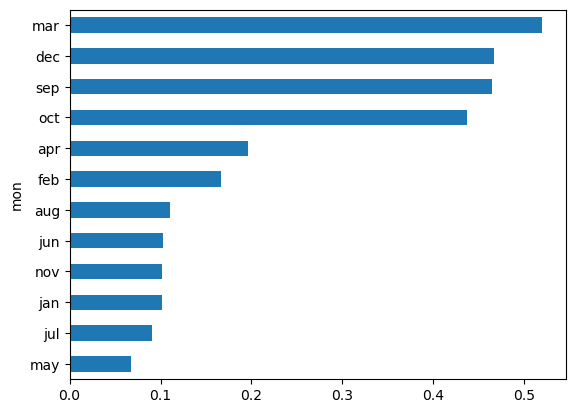

In [28]:
df.groupby('mon')['target'].mean().sort_values().plot(kind='barh')

<AxesSubplot:ylabel='prev_outcome'>

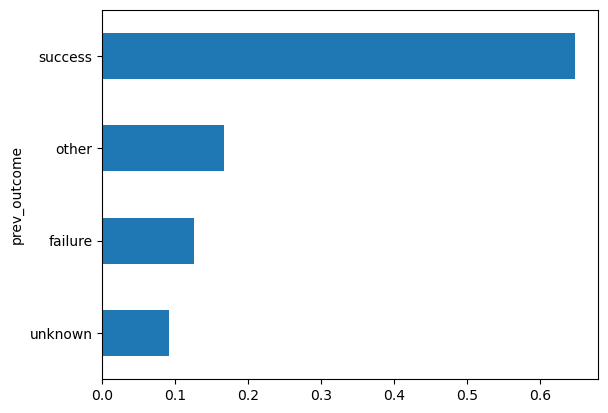

In [29]:
df.groupby('prev_outcome')['target'].mean().sort_values().plot(kind='barh')

In [30]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

Encodind the data

In [34]:
df['job'] = df['job'].map({'blue-collar':0,'entrepreneur':1,'housemaid':2,'services':3,'technician':4,'self-employed':5,
                           'admin.':6,'management':7,'unemployed':8,'retired':9,'student':10})
df['marital'] = df['marital'].map({'married':0,'single':2, 'divorced':1})
df['education_qual'] = df['education_qual'].map({'secondary':1,'tertiary':2,'primary':0})
df['call_type'] = df['call_type'].map({'cellular':2,'unknown':0,'telephone':1})
df['mon'] = df['mon'].map({'may':0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,'apr':7,'oct':8,'sep':9,'dec':10,'mar':11})
df['prev_outcome'] = df['prev_outcome'].map({'unknown':0,'failure':1,'other':2,'success':3})

C:\Users\NP Family\AppData\Local\Temp\ipykernel_15292\2790206024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job'] = df['job'].map({'blue-collar':0,'entrepreneur':1,'housemaid':2,'services':3,'technician':4,'self-employed':5,
C:\Users\NP Family\AppData\Local\Temp\ipykernel_15292\2790206024.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marital'] = df['marital'].map({'married':0,'single':2, 'divorced':1})
C:\Users\NP Family\AppData\Local\Temp\ipykernel_15292\2790206024.py:4: SettingWithC

In [35]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,7,0,2,0,5,0,261,1,0,no,0
1,44,4,2,1,0,5,0,151,1,0,no,0
2,33,1,0,1,0,5,0,76,1,0,no,0
3,47,0,0,1,0,5,0,92,1,0,no,0
4,33,10,2,1,0,5,0,198,1,0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,4,0,2,2,17,3,977,3,0,yes,1
45207,71,9,1,0,2,17,3,456,2,0,yes,1
45208,72,9,0,1,2,17,3,1127,5,3,yes,1
45209,57,0,0,1,1,17,3,508,4,0,no,0


In [36]:
x = df.drop(['y','target'],axis=1)
y = df['target']

In [37]:
x

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
0,58,7,0,2,0,5,0,261,1,0
1,44,4,2,1,0,5,0,151,1,0
2,33,1,0,1,0,5,0,76,1,0
3,47,0,0,1,0,5,0,92,1,0
4,33,10,2,1,0,5,0,198,1,0
...,...,...,...,...,...,...,...,...,...,...
45206,51,4,0,2,2,17,3,977,3,0
45207,71,9,1,0,2,17,3,456,2,0
45208,72,9,0,1,2,17,3,1127,5,3
45209,57,0,0,1,1,17,3,508,4,0


Spliting the data

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,confusion_matrix,f1_score,accuracy_score

In [39]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

Balancing the data

In [40]:
from imblearn.combine import SMOTEENN

smote = SMOTEENN(sampling_strategy='all')
X_train,y_train = smote.fit_resample(X_train,y_train)

In [41]:
X_train.shape, X_test.shape

((53841, 10), (9041, 10))

Model Fitting

In [42]:
from sklearn.model_selection import cross_val_score 
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
    dt = DecisionTreeClassifier(max_depth=depth) 
    dt.fit(X_train, y_train) 
    trainAccuracy = accuracy_score(y_train, dt.predict(X_train)) 
    dt = DecisionTreeClassifier(max_depth=depth) 
    valAccuracy = cross_val_score(dt, X_train, y_train, cv=10)
    dt = DecisionTreeClassifier(max_depth=depth) 
    dt.fit(X_train,y_train)
    y_pred = dt.predict(X_test)
    roc = roc_auc_score(y_test,y_pred)
    print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy,"ROC AUC Score :", roc, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7859995170966364 ROC AUC Score : 0.7190321347034585  Cross val score :  0.7859067031722315
Depth  :  2  Training Accuracy :  0.7998179825783325 ROC AUC Score : 0.7275377481131685  Cross val score :  0.7998736343179903
Depth  :  3  Training Accuracy :  0.8539403057149756 ROC AUC Score : 0.7864577064949264  Cross val score :  0.8528258183744676
Depth  :  4  Training Accuracy :  0.8617039059452833 ROC AUC Score : 0.7920598618237611  Cross val score :  0.8608123281472253
Depth  :  5  Training Accuracy :  0.8728106833082595 ROC AUC Score : 0.8004840532309261  Cross val score :  0.8716404843402717
Depth  :  6  Training Accuracy :  0.8885236158318011 ROC AUC Score : 0.8006548786593964  Cross val score :  0.8857561039208299
Depth  :  7  Training Accuracy :  0.9073754202187924 ROC AUC Score : 0.816055867666852  Cross val score :  0.9033636960021854
Depth  :  8  Training Accuracy :  0.91827789231255 ROC AUC Score : 0.8204300322013109  Cross val score :  0.9119

In [43]:
tree = DecisionTreeClassifier(max_depth=20)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
print("Training Accuracy :",tree.score(X_train,y_train))
print("Testing Accuracy :",tree.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

Training Accuracy : 0.9967496888987946
Testing Accuracy : 0.8214799247870811
F1 Score : 0.5117967332123411
ROC AUC Score : 0.8001087540711


In [44]:
tree = RandomForestClassifier(n_estimators=100,max_depth=6, max_features='sqrt')
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
print("Training Accuracy :",tree.score(X_train,y_train))
print("Testing Accuracy :",tree.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

Training Accuracy : 0.9086383982466893
Testing Accuracy : 0.7492534011724367
F1 Score : 0.468464243845252
ROC AUC Score : 0.8191842985304993


In [45]:
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
    model = XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
    model.fit(X_train,y_train) 
    model.score(X_test, y_test) 
    y_pred = model.predict(X_test)
    print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train),"ROC AUC Score :", roc_auc_score(y_test,y_pred), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.917107780316116 ROC AUC Score : 0.8244081688432793  Cross-Val score :  0.9161791531978241
Learning rate :  0.02  Train score :  0.9281031184413365 ROC AUC Score : 0.8350905862843547  Cross-Val score :  0.9252243346978082
Learning rate :  0.03  Train score :  0.9330807377277539 ROC AUC Score : 0.8357673995029697  Cross-Val score :  0.9294405204871271
Learning rate :  0.04  Train score :  0.9375011608253933 ROC AUC Score : 0.8377187713890664  Cross-Val score :  0.9338609877473198
Learning rate :  0.05  Train score :  0.9425159265243959 ROC AUC Score : 0.8386000583390371  Cross-Val score :  0.9376313634676698
Learning rate :  0.06  Train score :  0.9470106424472057 ROC AUC Score : 0.8400636446739215  Cross-Val score :  0.9415318161311552
Learning rate :  0.07  Train score :  0.9490722683456845 ROC AUC Score : 0.8416683127156133  Cross-Val score :  0.9442620936755419
Learning rate :  0.08  Train score :  0.9522482866217195 ROC AUC Score : 0.845711678

In [46]:
tree = XGBClassifier(learning_rate = 0.14, n_estimators=100, verbosity = 0)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
print("Training Accuracy :",tree.score(X_train,y_train))
print("Testing Accuracy :",tree.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

Training Accuracy : 0.9616277557994837
Testing Accuracy : 0.824023891162482
F1 Score : 0.5499292786421499
ROC AUC Score : 0.8511084417046023


In [47]:
df1 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred}).reset_index()

In [48]:
df1.drop('index',axis=1,inplace=True)

In [50]:
df1

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,0,1
4,0,0
...,...,...
9036,1,1
9037,0,0
9038,0,1
9039,0,0
